In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
sns.set()
%matplotlib inline

In [6]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8 # correlation
covs = [[stds[0]**2, stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [7]:
df=pd.DataFrame()

In [8]:
df['exp']=m[0]
df['salary']=m[1]

In [9]:
df

,exp,salary
0,21.737810,11.474506
1,9.291892,11.325761
2,28.518744,30.328383
3,26.205292,28.744431
4,10.846180,11.085950
...,...,...
995,24.870830,29.515566
996,34.551748,43.741581
997,33.288769,24.714468
998,21.971494,17.822615


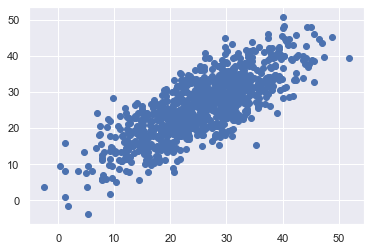

In [10]:
plt.scatter(x=df['exp'],y=df["salary"])

In [11]:
df.head()

,exp,salary
0,21.737810,11.474506
1,9.291892,11.325761
2,28.518744,30.328383
3,26.205292,28.744431
4,10.846180,11.085950


In [12]:
df.shape

(1000, 2)

In [13]:
len(df)

1000

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df[['exp']]
y=df['salary']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train

,exp
29,28.422632
535,27.152397
695,33.304740
557,37.800006
836,19.293271
...,...
106,23.073399
270,35.296259
860,29.870113
435,17.907971


In [20]:
y_train

29     29.293263
535    26.703910
695    31.233750
557    34.112502
836    30.393358
         ...    
106    19.943709
270    15.315262
860    32.739524
435    17.524802
102    41.751748
Name: salary, Length: 800, dtype: float64

In [22]:
y_train.iloc[0]

29.293262535205997

In [23]:
def gradient_descent(m_now,b_now,learning_rate,X_train,y_train):
    m_gradient=0
    b_gradient=0
    
    n=len(X_train)
    for i in range(n):
        x=X_train.iloc[i].exp
        y=y_train.iloc[i]
        
        m_gradient+=-(2/n)*x*(y-(m_now*x+b_now))
        b_gradient+=-(2/n)*(y-(m_now*x+b_now))
        
    m=m_now-learning_rate*m_gradient
    b=b_now-learning_rate*b_gradient
    
    return m,b
    

In [87]:
m=0
b=0
learning_rate=0.001
epochs=3000

for i in range(epochs):
    if(i%50==0):
        print(f"epoch :{i}")
    m,b=gradient_descent(m,b,learning_rate,X_train,y_train)

print(m,b)

epoch :0
epoch :50
epoch :100
epoch :150
epoch :200
epoch :250
epoch :300
epoch :350
epoch :400
epoch :450
epoch :500
epoch :550
epoch :600
epoch :650
epoch :700
epoch :750
epoch :800
epoch :850
epoch :900
epoch :950
epoch :1000
epoch :1050
epoch :1100
epoch :1150
epoch :1200
epoch :1250
epoch :1300
epoch :1350
epoch :1400
epoch :1450
epoch :1500
epoch :1550
epoch :1600
epoch :1650
epoch :1700
epoch :1750
epoch :1800
epoch :1850
epoch :1900
epoch :1950
epoch :2000
epoch :2050
epoch :2100
epoch :2150
epoch :2200
epoch :2250
epoch :2300
epoch :2350
epoch :2400
epoch :2450
epoch :2500
epoch :2550
epoch :2600
epoch :2650
epoch :2700
epoch :2750
epoch :2800
epoch :2850
epoch :2900
epoch :2950
0.9002907006143737 3.041468867492051


In [86]:
#2000
#0.9289327567071849 2.233560273326324

In [88]:
X_test.iloc[0].exp

29.64134178720826

In [89]:
ypred_scratch=[]
for i in range(len(X_test)):
    ypred_scratch.append(m*X_test.iloc[i].exp+b)
    

In [90]:
ypred_scratch

[29.727293232247884,
 34.23320766522586,
 30.881921940381794,
 29.471822704972592,
 31.090342413570095,
 21.94669057966588,
 26.50098218405262,
 29.121438684747044,
 27.336614509288893,
 6.214329906665602,
 14.031177344385208,
 29.362725535079345,
 17.476915319363084,
 12.640036801683491,
 29.914841234454993,
 33.0246404358188,
 28.08933454189359,
 16.434966222805674,
 22.013442922642596,
 22.154379422390406,
 23.598686769620624,
 30.09656723194615,
 18.344885704477786,
 23.783601468160544,
 19.8463003144931,
 22.59896327413896,
 22.33995019150493,
 29.322945906894603,
 23.561160994083583,
 14.11041703002622,
 13.787122951341148,
 29.316194902871764,
 32.35222586736519,
 32.607900331428745,
 31.76777503601333,
 21.535812483275933,
 28.94813468798451,
 30.41401318983497,
 15.25272973395427,
 29.50293889623255,
 31.909294135308805,
 31.476918488092128,
 26.87238129521909,
 43.3192425924451,
 22.233803741641978,
 39.35425740436923,
 10.693532518363291,
 31.07731652536759,
 16.476362544022

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr=LinearRegression()

In [93]:
lr.fit(X_train,y_train)

LinearRegression()

In [94]:
ypred_sklearn=lr.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
print("scratch:",np.sqrt(mean_squared_error(y_test,ypred_scratch)))
print("sklearn:",np.sqrt(mean_squared_error(y_test,ypred_sklearn)))

scratch: 5.111637812457719
sklearn: 4.995461128595123


In [102]:
print(X_test.min())
print(X_test.max())

exp    3.524263
dtype: float64
exp    46.972446
dtype: float64


In [103]:
lr.intercept_

6.6563391306494175

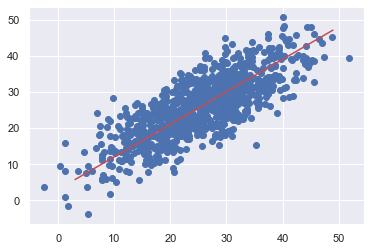

In [104]:
plt.scatter(df.exp,df.salary)
plt.plot(list(range(3,50)),[m*x+b for x in range(3,50)],color='r')

In [105]:
lr.coef_

array([0.77213596])

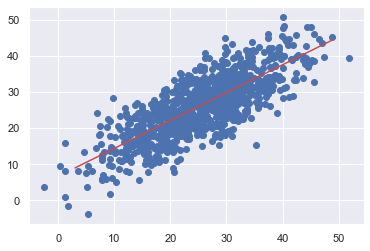

In [106]:
plt.scatter(df.exp,df.salary)
plt.plot(list(range(3,50)),[0.77213596*x+6.6563391306494175 for x in range(3,50)],color='r')